### Запуск и остановка симуляции

#### Инициализация

In [34]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import time

# Подключение
client = RemoteAPIClient()
sim = client.getObject('sim')

print("Подключено к CoppeliaSim")

Подключено к CoppeliaSim


#### START

In [35]:
sim.startSimulation()

#### STOP

In [67]:
sim.stopSimulation()

#### Запуск и остановка по таймеру

In [1]:
sim.startSimulation()
time.sleep(2)
sim.stopSimulation()

Подключено к CoppeliaSim


### Сообщение в командную строку

In [10]:
sim.addLog(sim.verbosity_scriptinfos, "Привет из Python!")

### Работа с сигналами

#### Чтение сигналов

In [13]:
message = sim.getStringSignal('string_test_sig')
if message is not None:
    print("String:", message)

value = sim.getFloatSignal('float_test_sig')
if value is not None:
    print("Float:", value)

value = sim.getInt32Signal('int_test_sig')
if value is not None:
    print("Int:", value)


String: in-out test
Float: 3.1415
Int: 42


#### Отправка сигналов

In [12]:
# Строковый
sim.setStringSignal('string_test_sig', 'in-out test')
# Числовой
sim.setFloatSignal('float_test_sig', 3.1415)
sim.setInt32Signal('int_test_sig', 42)

message = sim.getStringSignal('string_test_sig')
if message is not None:
    print("String:", message)

value = sim.getFloatSignal('float_test_sig')
if value is not None:
    print("Float:", value)

value = sim.getInt32Signal('int_test_sig')
if value is not None:
    print("Int:", value)

String: in-out test
Float: 3.1415
Int: 42


#### Данные об объекте

In [15]:
obj = sim.getObject('/sofa')  # абсолютное имя из сцены
print('obj = ', obj)

pos = sim.getObjectPosition(obj, sim.handle_world)
print("Позиция:", pos)  # [x, y, z]

quat = sim.getObjectQuaternion(obj, -1)  # [x, y, z, w]
print("Ориентация в кватернионах:\n\t", quat)
# или
euler = sim.getObjectOrientation(obj, -1)  # [rx, ry, rz]
print("Ориентация по Эйлеру:\n\t", euler)

obj =  176
Позиция: [1.4249991178512573, -1.0762197971343994, 0.06723662465810776]
Ориентация в кватернионах:
	 [0.5213338732719421, 0.47771456837654114, 0.5213336944580078, -0.47771432995796204]
Ориентация по Эйлеру:
	 [-1.570796760966861, 0.08726635796551016, -1.5707963866555237]


### Управление джоинтами

#### Установка положения

In [57]:
joint = sim.getObject('/Cuboid/joint')
sim.setObjectInt32Param(joint, sim.jointintparam_ctrl_enabled, 1)
sim.setJointTargetPosition(joint, 70*3.14/180)

1

#### Установка скорости

In [65]:
joint = sim.getObject('/Cuboid/joint')

sim.setObjectInt32Param(joint, sim.jointintparam_ctrl_enabled, 0)

v = sim.getJointVelocity(joint)
print("speed = ", v)
if v > 10:
    sim.setJointTargetVelocity(joint, 2.0)
    print("speed set to 2")
else:
    v = v * 2 + 1
    sim.setJointTargetVelocity(joint, v)
    print("speed set to ", v)

speed =  4.992378048780499
speed set to  10.984756097560998


### Вызов функций в скрипте

In [63]:
h = sim.getObject('/spawner')
sim.callScriptFunction('spawn', h)

### Чтение сенсора

#### Разовое

In [38]:
proximity_sensor = sim.getObject('/Sensor')

result, distance, detected_point, detected_object_handle, normal_vec = \
    sim.readProximitySensor(proximity_sensor)

if result:
    print(f"Объект обнаружен на расстоянии: {distance:.3f} м")
else:
    print("Объект не обнаружен")

Объект не обнаружен


#### В цикле

In [37]:
proximity_sensor = sim.getObject('/Sensor')


result, distance, detected_point, detected_object_handle, normal_vec = \
    sim.readProximitySensor(proximity_sensor)

start_time = time.time()
duration = 1.0  # секунда

while time.time() - start_time < duration:
    result, distance, detected_point, detected_object_handle, normal_vec = \
            sim.readProximitySensor(proximity_sensor)

    if result:
        print(f"Объект обнаружен на расстоянии: {distance:.3f} м")
    else:
        print("Объект не обнаружен")
    time.sleep(0.01)  # небольшая пауза, чтобы не грузить CPU


Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен
Объект не обнаружен


#### Чтение видеосенсора

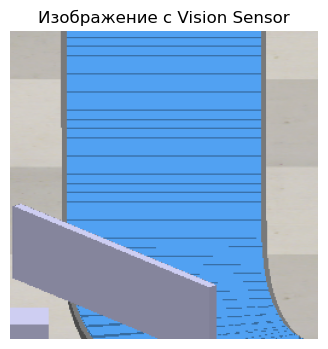

In [66]:
# Преобразование в OpenCV-совместимый формат (NumPy)
import numpy as np
import matplotlib.pyplot as plt

client = RemoteAPIClient()
sim = client.getObject('sim')

# Примеры имён (должны совпадать с именами в дереве сцены)
vision_sensor = sim.getObject('/visionSensor')

img, res = sim.getVisionSensorImg(vision_sensor)

# Преобразуем в NumPy массив и приводим к правильному виду
img_array = np.frombuffer(img, dtype=np.uint8).reshape(res[1], res[0], 3)
# CoppeliaSim отдаёт в формате RGB и "вверх ногами"
img_rgb = np.flipud(img_array)  # переворачиваем по вертикали

# Отображаем в Jupyter
plt.figure(figsize=(4, 4))
plt.imshow(img_rgb)
plt.axis('off')  # убираем оси
plt.title('Изображение с Vision Sensor')
plt.show()